In [1]:
!pip install nltk

In [2]:
import pandas as pd
messages=pd.read_csv(r'C:\Users\pc\Desktop\Machine Learning\SmsSpamOrHam\sms+spam+collection\SMSCollection.csv', sep='\t', names= ["label","message"])

import nltk
import re

from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
messages.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [4]:
wnl=WordNetLemmatizer()
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    
    review=[wnl.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer #This line imports the CountVectorizer class from scikit-learn, which is used to convert a collection of text documents into a matrix of token counts.
cv=CountVectorizer(max_features=5000) #Here, you're creating a CountVectorizer object with a maximum of 5000 features. This means that only the top 5000 most frequent words will be considered as features.
X=cv.fit_transform(corpus).toarray() #This line fits the CountVectorizer to your corpus (presumably a list of text documents) and transforms the corpus into a document-term matrix represented as a NumPy array. Each row in this array corresponds to a document, and each column corresponds to a word in the vocabulary created by the CountVectorizer. The .toarray() method converts the sparse matrix returned by fit_transform into a dense NumPy array.

y=pd.get_dummies(messages['label']) #This line creates dummy variables for the 'label' column in your 'messages' DataFrame using pandas' get_dummies() function. Each unique label will become a separate column with binary values indicating the presence or absence of that label.
y=y.iloc[:,1].values #This line selects only one column from the dummy variable DataFrame y (presumably to avoid multicollinearity issues), converts it to a NumPy array, and assigns it to the variable y.
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [6]:
#Train test split
from sklearn.model_selection import train_test_split #Imports the train_test_split function from the sklearn.model_selection module. This function is used to split arrays or matrices into random train and test subsets.
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=0) 
''' Splits the features (X) and target labels (y) into training and testing sets.
    X: The features (independent variables).
    y: The target labels (dependent variable).
    test_size=0.20: Specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training.
    random_state=0: Sets the random seed for reproducibility. It ensures that each time you run the code, the same random splits are generated.'''
#Training model using Naive Bayes Classifier 
from sklearn.naive_bayes import MultinomialNB # Imports the MultinomialNB class from the sklearn.naive_bayes module. This class implements the Naive Bayes algorithm for multinomially distributed data.
mv=MultinomialNB() #Creates an instance of the MultinomialNB classifier.
spam_detection_model=mv.fit(X_train,y_train) #Fits the Naive Bayes classifier to the training data (X_train and y_train). The fit method trains the model on the provided training data.

y_pred=spam_detection_model.predict(X_test) #Uses the trained model (spam_detection_model) to make predictions on the test set (X_test). The predict method predicts the target labels based on the input features (X_test) and returns the predicted labels (y_pred), which can be compared with the actual labels (y_test) for evaluation.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Naive Bayes
nb = MultinomialNB()
nb_model = nb.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# SVM
svc = SVC()
svc_model = svc.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# KNN
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Confusion Matrices
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Accuracy Scores
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# F1 Scores
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("Naive Bayes:")
print("Confusion Matrix:\n", conf_matrix_nb)
print("Accuracy:", accuracy_nb)
print("F1 Score:", f1_nb)

print("\nSVM:")
print("Confusion Matrix:\n", conf_matrix_svc)
print("Accuracy:", accuracy_svc)
print("F1 Score:", f1_svc)

print("\nRandom Forest:")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)

print("\nDecision Tree:")
print("Confusion Matrix:\n", conf_matrix_dt)
print("Accuracy:", accuracy_dt)
print("F1 Score:", f1_dt)

print("\nKNN:")
print("Confusion Matrix:\n", conf_matrix_knn)
print("Accuracy:", accuracy_knn)
print("F1 Score:", f1_knn)


Naive Bayes:
Confusion Matrix:
 [[944  11]
 [  9 151]]
Accuracy: 0.9820627802690582
F1 Score: 0.9821090848618373

SVM:
Confusion Matrix:
 [[955   0]
 [ 17 143]]
Accuracy: 0.9847533632286996
F1 Score: 0.9843929052347059

Random Forest:
Confusion Matrix:
 [[955   0]
 [ 20 140]]
Accuracy: 0.9820627802690582
F1 Score: 0.98155781190703

Decision Tree:
Confusion Matrix:
 [[946   9]
 [ 13 147]]
Accuracy: 0.9802690582959641
F1 Score: 0.9801647964120341

KNN:
Confusion Matrix:
 [[955   0]
 [ 94  66]]
Accuracy: 0.915695067264574
F1 Score: 0.9001398369973018


In [7]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

The accuracy of Naive Bayes clasifier is 98.20627802690582%

 [[944  11]
 [  9 151]]


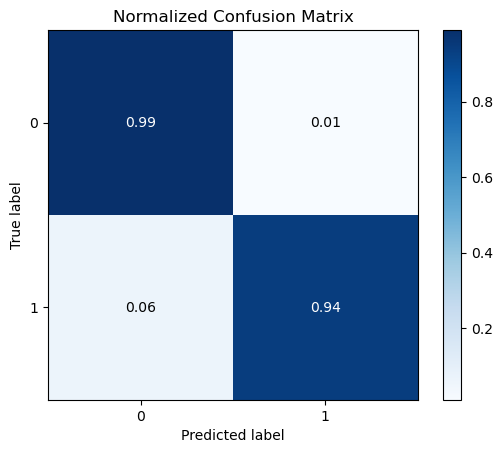

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_m=confusion_matrix(y_test,y_pred)

confusion_m

print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy_score(y_test, y_pred) * 100))
print("\n", confusion_m)

import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True)
plt.show()

In [10]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)

accuracy

0.9820627802690582

In [29]:
!pip install gradio

In [11]:
import gradio as gr
def predict_spam(message):
    processed_message = re.sub('[^a-zA-Z]', ' ', message)
    processed_message = processed_message.lower()
    processed_message = processed_message.split()
    processed_message = [wnl.lemmatize(word) for word in processed_message if not word in stopwords.words('english')]
    processed_message = ' '.join(processed_message)
    vectorized_message = cv.transform([processed_message]).toarray()
    prediction = spam_detection_model.predict(vectorized_message)[0]
    return "Spam" if prediction == 1 else "Ham"

# Create Gradio interface
interface = gr.Interface(fn=predict_spam, inputs="text", outputs="text", title="Spam Detection", description="Enter a message to check if it is spam or not.")

# Launch Gradio interface
interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
